In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as np

<h2 style="color:#0000FF;">其實我們不一定要爬蟲</h2> 

我們要注意<b style="color:red;">我們想做的事</b>, 不要迷失在爬蟲技巧中！

# Google 翻譯

## 可以用一個套件，叫做
     googletrans

In [2]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp37-none-any.whl size=15776 sha256=3eba870f917213e8b56db99bcb7f29e898c225e90883c6d4891af5017b56b2a6
  Stored in directory: /Users/kelly/Library/Caches/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [3]:
from googletrans import Translator

In [4]:
pipi = Translator()

In [5]:
result = pipi.translate("This is a book.", dest="zh-tw")

In [7]:
print(result.text)

這是一本書。


In [9]:
result = pipi.translate("這是一本書", dest="ja")

In [11]:
print(result.text)

これは本です


#### 基本指令

*`src`：原文

*`dest`：目標語言

常用語言：

*中文：zh-tw

*日文：ja

*英文：en

*韓文：ko

## `pandas-datareader`

    常用的爬蟲集

In [13]:
!pip install pandas-datareader

     |████████████████████████████████| 112kB 167kB/s eta 0:00:01


In [14]:
import pandas_datareader.data as web

In [15]:
df = web.DataReader("AAPL", "yahoo")

In [16]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-11,113.800003,111.339996,112.260002,111.620003,41401700.0,102.558395
2014-12-12,111.870003,109.580002,110.459999,109.730003,56028100.0,100.821831
2014-12-15,111.599998,106.349998,110.699997,108.230003,67218100.0,99.443619
2014-12-16,110.160004,106.260002,106.370003,106.750000,60790700.0,98.083740
2014-12-17,109.839996,106.820000,107.120003,109.410004,53411800.0,100.527809


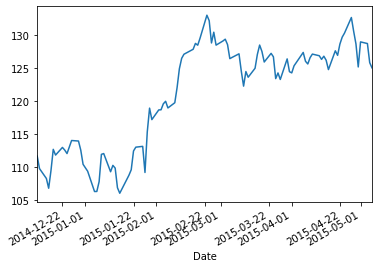

In [17]:
df[:100].Close.plot()

## MLB資料

    !pip inatall pybaseball

## `requests` + `BeautifulSoup`

In [18]:
import requests
from bs4 import BeautifulSoup

In [19]:
url = "http://www.marieclaire.com.tw/love-sex/astrlogy"

In [22]:
resp = requests.get(url)

<!DOCTYPE html>
<html lang="zh-Hant">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=0"/>
<title>LOVE & SEX | Marie Claire 美麗佳人</title>
<meta name="title" content="LOVE & SEX | Marie Claire 美麗佳人"/>
<meta name="keywords" content="兩性,愛情,性愛"/>
<meta name="news_keywords" itemprop="keywords" content="兩性,愛情,性愛"/>
<meta name="description" content="兩性關係,星座運勢，陪伴你一起度過生命中的起起伏伏。"/>
<link rel="preconnect" href="https://stats.g.doubleclick.net">
<link rel="preconnect" href="https://www.google.com.tw">
<link rel="preconnect" href="https://www.google.com">
<link rel="preconnect" href="https://www.google-analytics.com">
<link rel="preconnect" href="https://fonts.gstatic.com">
<link rel="preconnect" href="https://tpc.googlesyndication.com">
<link rel="preconnect" href="https://pixel.adsafeprotected.com">
<link rel="preconnect" href="htt
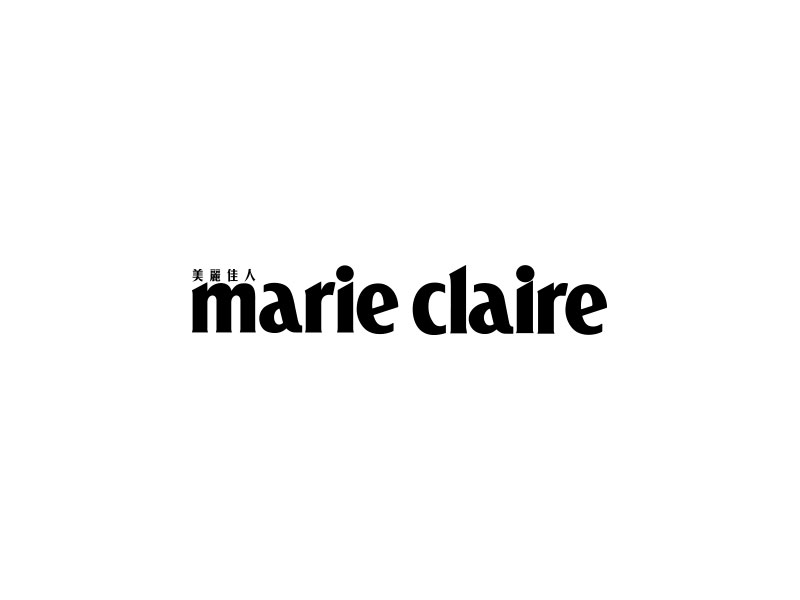
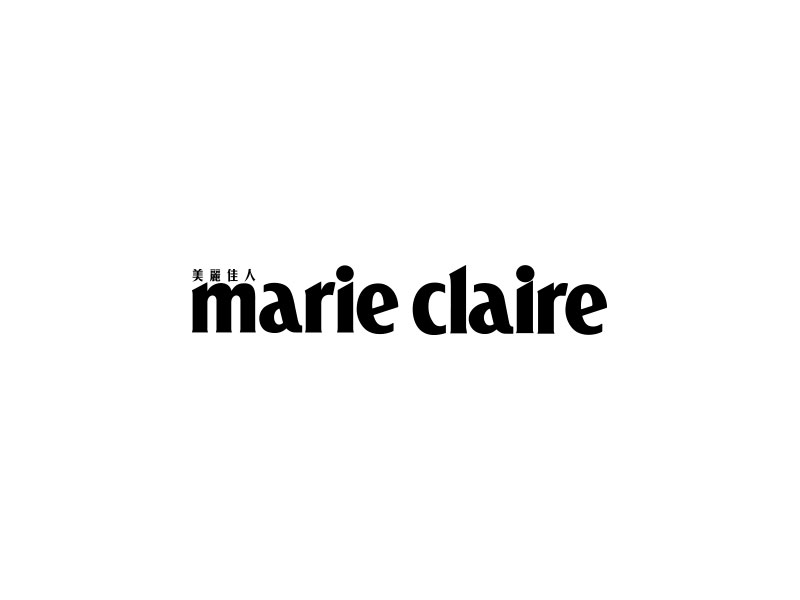
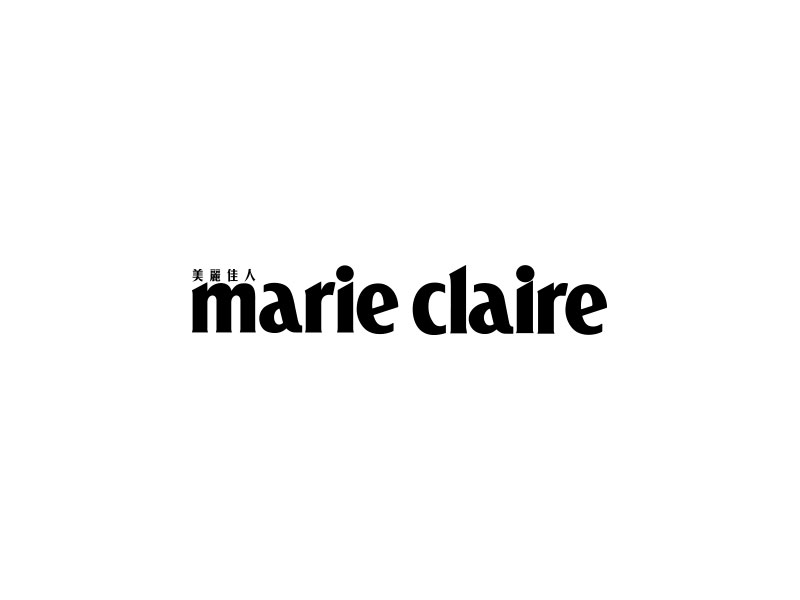
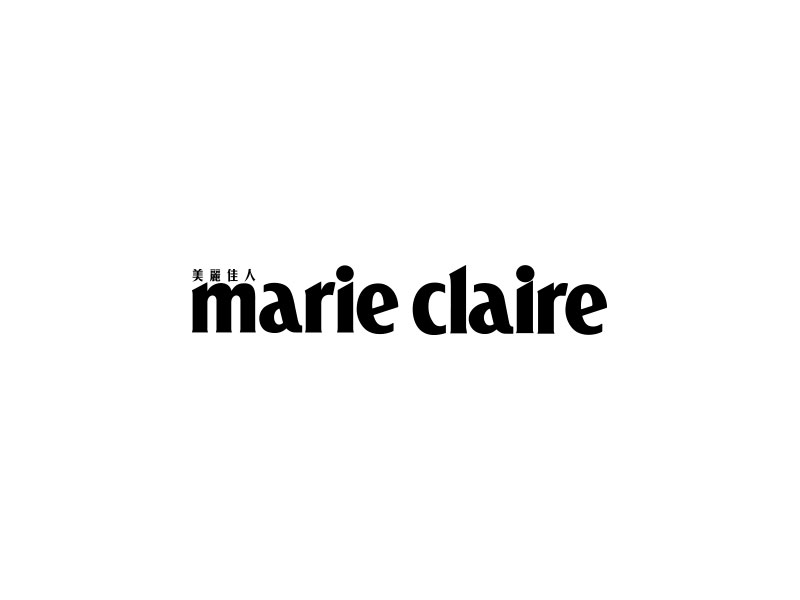
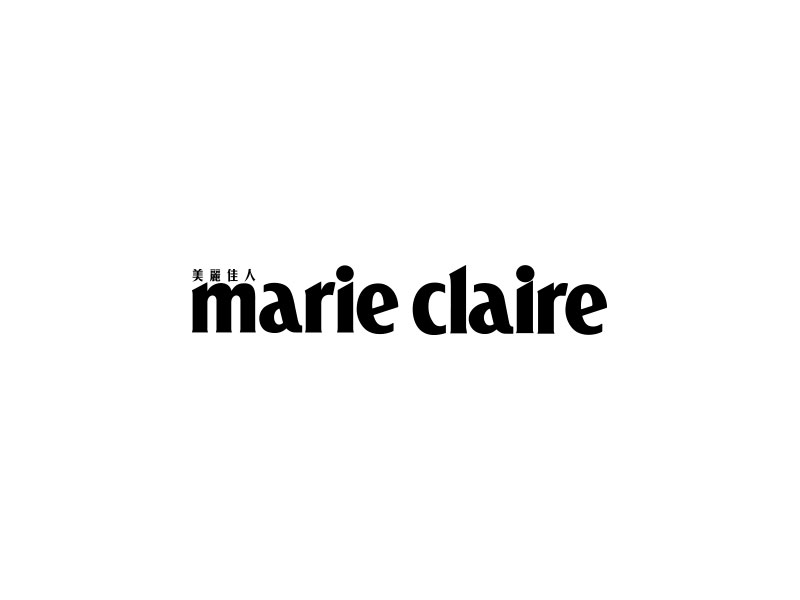
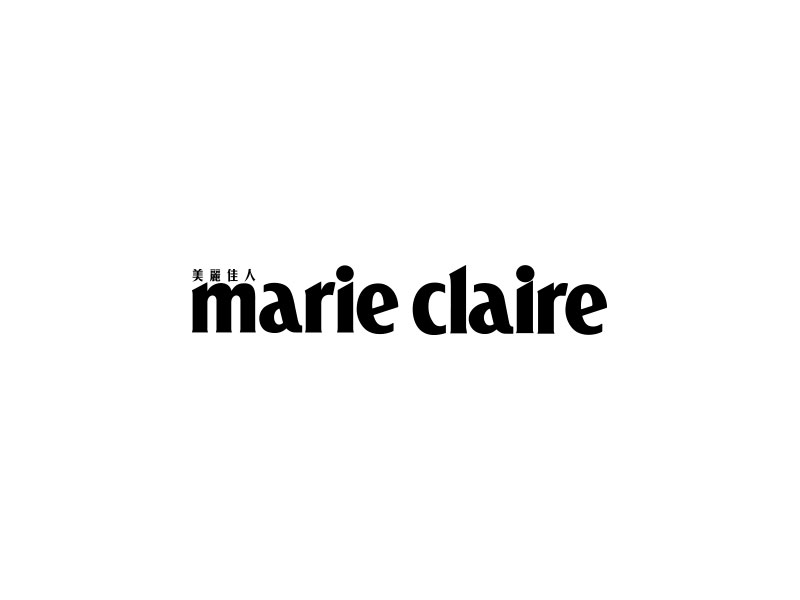
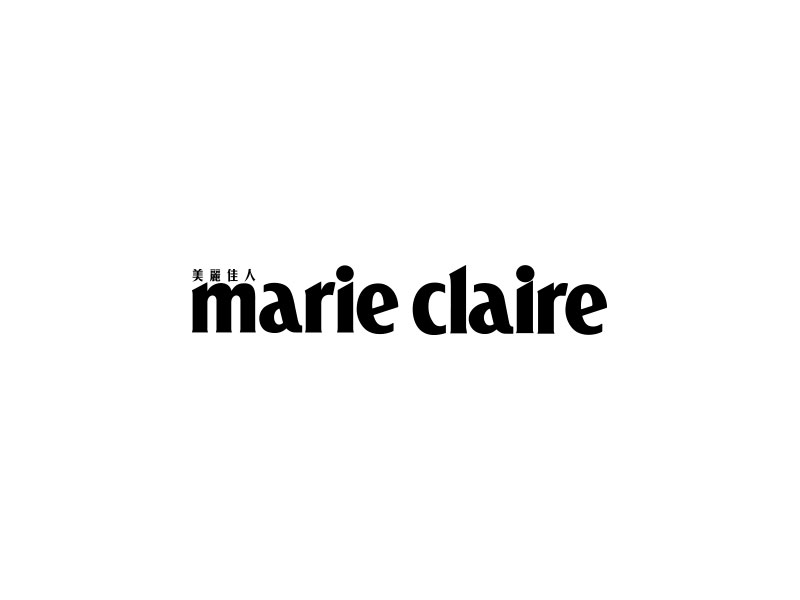
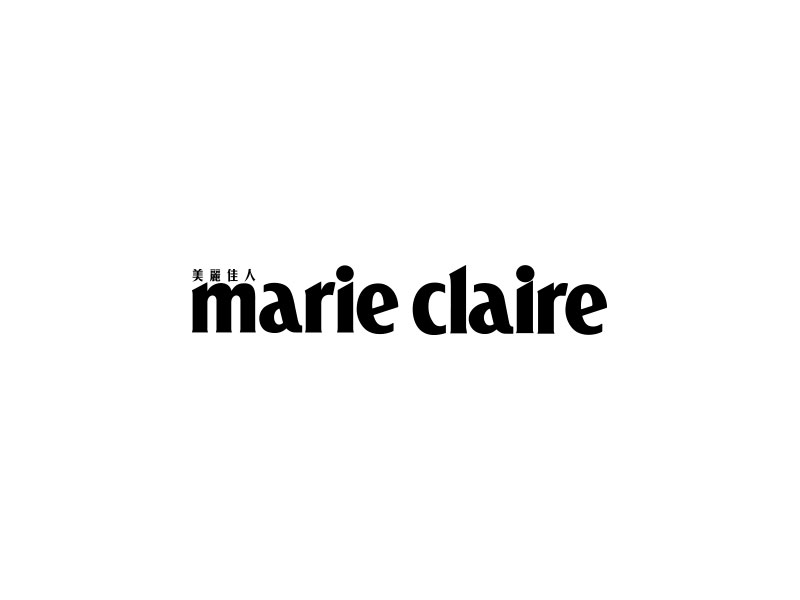

In [23]:
print(resp.text)

In [24]:
soup = BeautifulSoup(resp.text, "lxml")

In [25]:
hot = soup.find_all("div", class_="hot")

[<div class="hot">
 <a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46548">
 <img alt="《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（上）" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201912/5DE8B91D6F0F81575532829.jpeg" id="lazy_images" src=""/>
 <h4>LOVE &amp; SEX 星座運勢</h4>
 <h3>《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（上）</h3>
 </a>
 <a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46551">
 <img alt="《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（下）" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201912/5DE8CA5A526311575537242.jpeg" id="lazy_images" src=""/>
 <h4>LOVE &amp; SEX 星座運勢</h4>
 <h3>《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（下）</h3>
 </a>
 <a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46319">
 <img alt="【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201911/5DDA49EDEC1541574586861.jpeg" id="lazy_images" src=""/>
 <
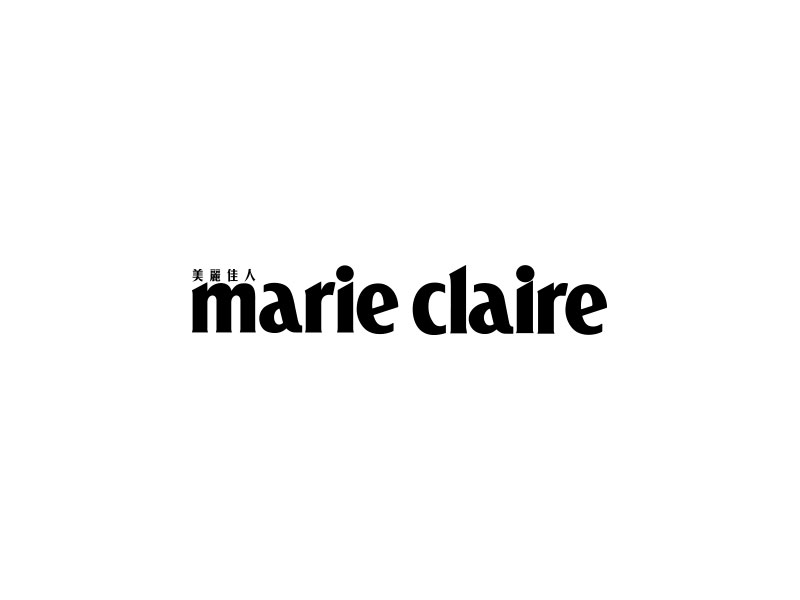
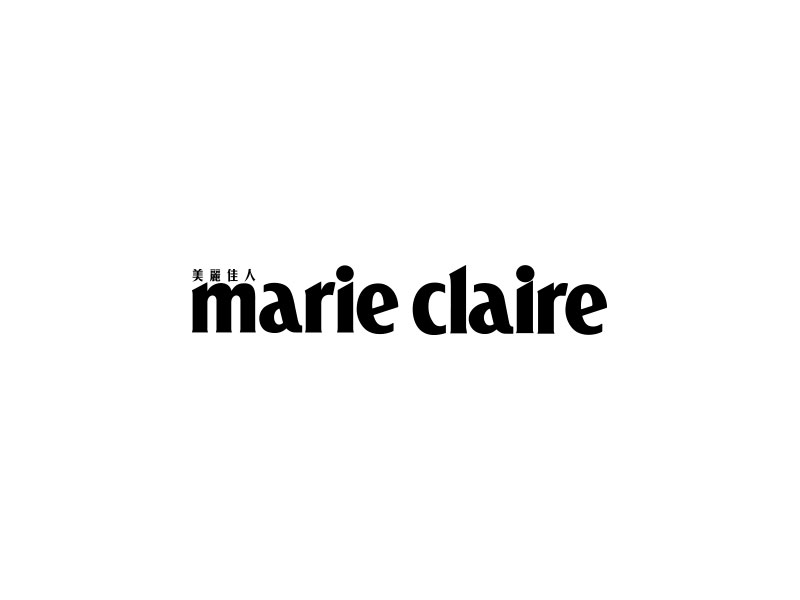
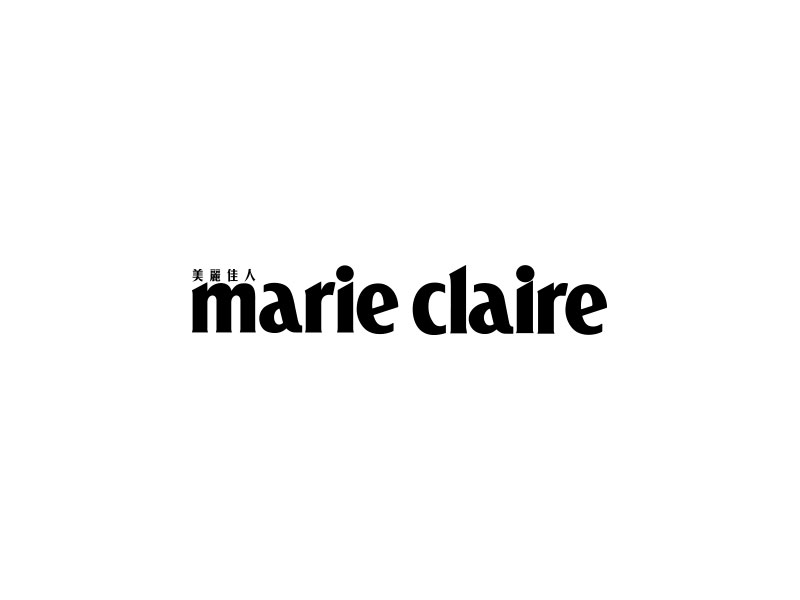
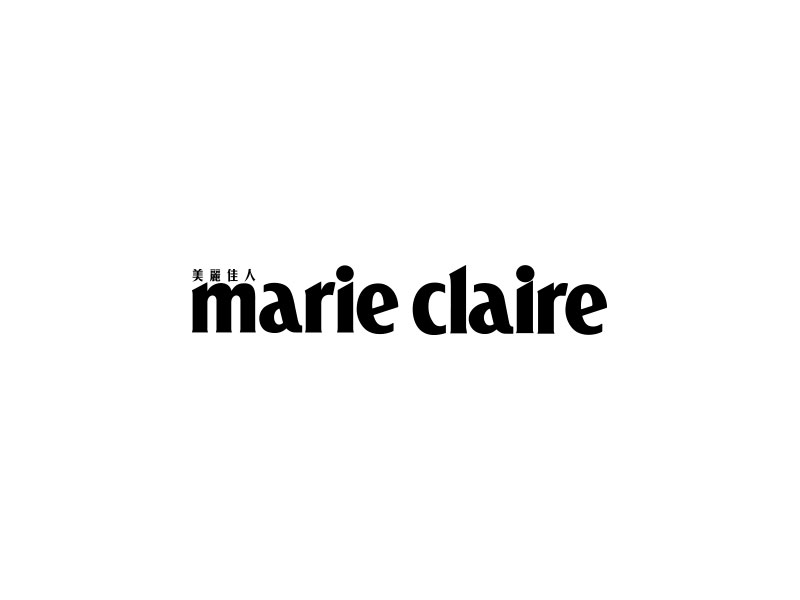

In [26]:
hot

In [29]:
articles = hot[0].find_all("a")

In [30]:
len(articles)

4

In [31]:
item = articles[2]

In [32]:
item.attrs

{'href': 'https://www.marieclaire.com.tw/love-sex/astrology/46319',
 'class': ['hotBox']}

In [33]:
item["href"]

'https://www.marieclaire.com.tw/love-sex/astrology/46319'

In [34]:
title = item.find("h3")

In [35]:
title

<h3>【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了</h3>

In [37]:
title.contents[0]

'【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了'

In [38]:
#下載安裝

!pip install selenium

     |████████████████████████████████| 911kB 761kB/s eta 0:00:01


## http://chromedriver.chromium.org/

In [40]:
from selenium import webdriver

In [41]:
#設定網址

path = "http://www.google.com.tw"

In [44]:
#叫出瀏覽器

driver = webdriver.Chrome("./chromedriver")

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [43]:
driver.get(path)

NameError: name 'driver' is not defined

In [46]:
#關閉瀏覽器

driver.close()

NameError: name 'driver' is not defined